In [1]:
import sys
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from rtbm import RTBM
import minimizer

from costfunctions import Logarithmic

%load_ext autoreload

In [2]:
%autoreload

# Example 1

## Generate data

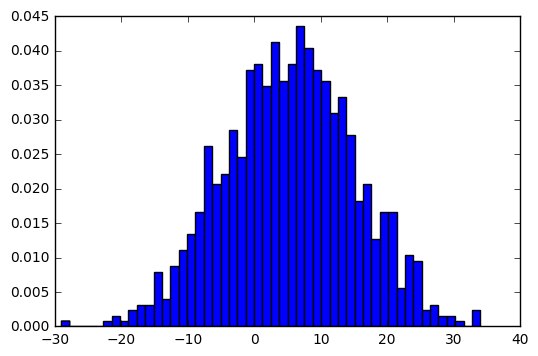

In [3]:
# simple gaussian
n = 1000
data = (np.random.normal(5,10,n)).reshape(1,n)
plt.hist(data.T, bins=50, normed=True);

## Training

In [4]:
a = RTBM(1,1)
a.random_init()


In [6]:
a.get_bounds()

([-10, 1e-05, -10, -10, 1e-05], [10, 10, 10, 10, 10])

In [5]:
minim = minimizer.CMA()
minim.set_costfunction(Logarithmic)

In [ ]:
solution = minim.train(a, data, 0)

## Testing output

In [ ]:
test_data = (np.linspace(-40,40, 100)).reshape(1, 100)
plt.hist(data.T, bins=50, normed=True);
plt.plot(test_data.flatten(), a(test_data).flatten(), 'o-')

# Example 2

## Generate data

In [ ]:
def gaussian_mixture(n):
    v = np.zeros(n)
    u = np.random.random_sample(n)
    for i in range(n):
        if u[i] < 0.6:
            v[i] = np.random.normal(-5, 3)
        elif u[i] < 0.7:
            v[i] = np.random.normal(2, 1)
        else:
            v[i] = np.random.normal(5, 5)
    return v

n = 1000
data = (gaussian_mixture(n)).reshape(1,n)
plt.hist(data.T, normed=True, bins=50);

## Training

In [ ]:
a = RTBM(1,2)
a.random_init()

In [ ]:
minim = minimizer.CMA()
minim.set_costfunction(Logarithmic)

In [ ]:
solution = minim.train(a, data, 0)

## Testing output

In [ ]:
test_data = (np.linspace(-40,40, 100)).reshape(1, 100)
plt.hist(data.T, bins=50, normed=True);
plt.plot(test_data.flatten(), a(test_data).flatten(), 'o-')